In [10]:
# 01_EDA_CancerData.ipynb
# Exploratory Data Analysis for Cancer Dataset (Text2SQL Capstone)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display all columns
pd.set_option('display.max_columns', None)

# Define file path (adjust if needed)
file_path = "../data/data_Cancer_v2_Merged Data 2.csv"

# Load dataset
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
df.head(3)


✅ Dataset loaded successfully!
Shape: 483 rows × 17 columns


,patientID,encounterID,diagnosisCodeDescription,Cancer Diagnosis Category,Specialty,Encounter Type,encounterAdmitDateTime,encounterDischargeDateTime,Facility Code,ageAtEncounter,ageGroup,LOS(hours),readmission,YQ (YearQuarter),gender,nationality,national
0,1,101,"C15.9: Malignant neoplasm of esophagus, unspec...",Malignant neoplasm of esophagus,Hematology,Inpatient,2024-02-28 07:17:17,2024-02-29 09:17:17,MF001,20,18-24,1.083333,Yes,2024 - Q1,Female,American,Expatriate
1,2,102,C50.919: Malignant neoplasm of unspecified sit...,Malignant neoplasm of breast,Oncology,Outpatient,2024-03-23 02:53:14,2024-03-23 08:25:35,MF1245,62,55-64,0.230799,No,2024 - Q1,Female,Egyptian,Expatriate
2,3,103,C34.9: Malignant neoplasm of bronchus and lung...,Malignant neoplasm of bronchus and lung,Pulmonology,Inpatient,2024-04-26 15:32:37,2024-04-27 16:52:37,MF002,42,35-44,1.055556,No,2024 - Q2,Male,Filipino,Expatriate


In [11]:
# General info about dataset
print("=== Dataset Info ===")
df.info()

# Column names
print("\n=== Columns ===")
print(df.columns.tolist())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patientID                   483 non-null    int64  
 1   encounterID                 483 non-null    int64  
 2   diagnosisCodeDescription    483 non-null    object 
 3   Cancer Diagnosis Category   483 non-null    object 
 4   Specialty                   483 non-null    object 
 5   Encounter Type              483 non-null    object 
 6   encounterAdmitDateTime      483 non-null    object 
 7   encounterDischargeDateTime  483 non-null    object 
 8   Facility Code               483 non-null    object 
 9   ageAtEncounter              483 non-null    int64  
 10  ageGroup                    483 non-null    object 
 11  LOS(hours)                  483 non-null    float64
 12  readmission                 483 non-null    object 
 13  YQ (YearQuarte

In [12]:
# Missing values per column
print("=== Missing Values ===")
missing_summary = df.isnull().sum().sort_values(ascending=False)
display(missing_summary)

# Percentage of missing values
missing_percent = (df.isnull().mean() * 100).round(2)
display(missing_percent[missing_percent > 0])


=== Missing Values ===


patientID                     0
encounterID                   0
diagnosisCodeDescription      0
Cancer Diagnosis Category     0
Specialty                     0
Encounter Type                0
encounterAdmitDateTime        0
encounterDischargeDateTime    0
Facility Code                 0
ageAtEncounter                0
ageGroup                      0
LOS(hours)                    0
readmission                   0
YQ (YearQuarter)              0
gender                        0
nationality                   0
national                      0
dtype: int64

Series([], dtype: float64)

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
datetime_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)
print("Date/Time Columns:", datetime_cols)


Numeric Columns: ['patientID', 'encounterID', 'ageAtEncounter', 'LOS(hours)']
Categorical Columns: ['diagnosisCodeDescription', 'Cancer Diagnosis Category', 'Specialty', 'Encounter Type', 'encounterAdmitDateTime', 'encounterDischargeDateTime', 'Facility Code', 'ageGroup', 'readmission', 'YQ (YearQuarter)', 'gender', 'nationality', 'national']
Date/Time Columns: ['encounterAdmitDateTime', 'encounterDischargeDateTime']


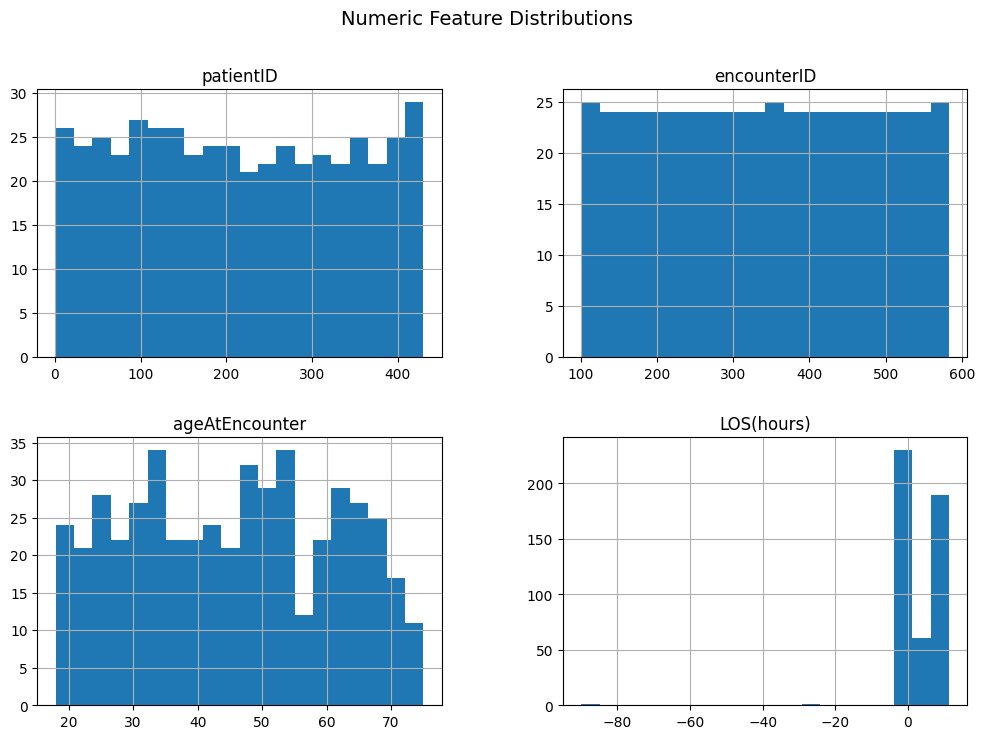

In [14]:
# Visualize distributions for numeric features
sample_numeric = numeric_cols[:6]  # adjust count if needed

df[sample_numeric].hist(figsize=(12, 8), bins=20)
plt.suptitle("Numeric Feature Distributions", fontsize=14)
plt.show()


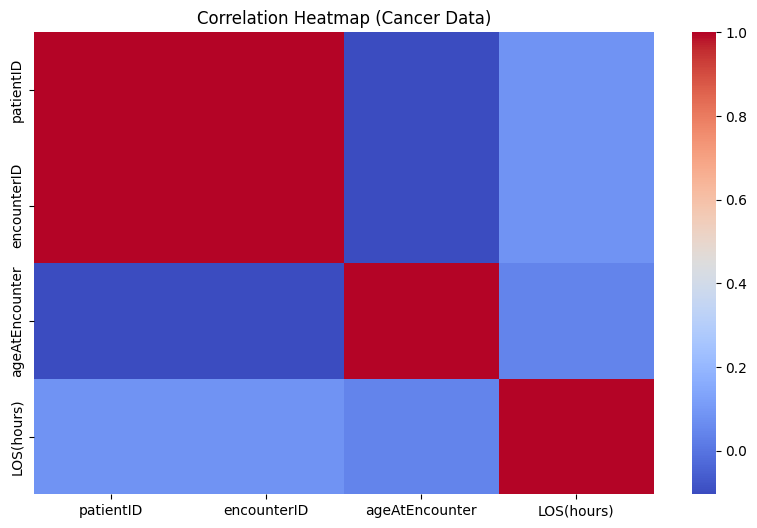

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Cancer Data)")
plt.show()


In [16]:
print("=== Unique Values (for each column) ===")
unique_counts = df.nunique().sort_values()
display(unique_counts)


=== Unique Values (for each column) ===


Encounter Type                  2
gender                          2
readmission                     2
national                        2
ageGroup                        7
nationality                    10
YQ (YearQuarter)               14
Specialty                      14
Cancer Diagnosis Category      19
diagnosisCodeDescription       39
ageAtEncounter                 58
LOS(hours)                    154
Facility Code                 315
encounterDischargeDateTime    333
encounterAdmitDateTime        335
patientID                     430
encounterID                   483
dtype: int64